In [6]:
pip install split-folders

In [54]:
import tensorflow

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
grapes = ImageDataGenerator(rescale=1./255)

grapes_data = grapes.flow_from_directory('/content/drive/MyDrive/DEEP_LEARNING _DATASETS/grapes data set')


Found 4099 images belonging to 4 classes.


In [8]:
import splitfolders

In [10]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/DEEP_LEARNING _DATASETS/grapes data set', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 


Copying files: 4099 files [20:43,  3.30 files/s]


In [44]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

In [45]:
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
train_generator = train_datagen.flow_from_directory(
'/content/output/train',
target_size=(150, 150),batch_size=32,class_mode='categorical')

Found 2868 images belonging to 4 classes.


In [48]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/output/val',
      target_size=(150,150),batch_size=32,class_mode="categorical")

Found 818 images belonging to 4 classes.


In [49]:
test_generator = test_datagen.flow_from_directory(
'/content/output/test',target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 413 images belonging to 4 classes.


In [50]:
history = model.fit_generator(
train_generator,
steps_per_epoch=90,
epochs=15,
validation_data=validation_generator,
validation_steps=26)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
90/90 [==============================] - 7s 74ms/step - loss: 0.7817 - acc: 0.6569 - val_loss: 0.7047 - val_acc: 0.6736
Epoch 2/15
90/90 [==============================] - 6s 69ms/step - loss: 0.4207 - acc: 0.8281 - val_loss: 0.3237 - val_acc: 0.8912
Epoch 3/15
90/90 [==============================] - 6s 68ms/step - loss: 0.3017 - acc: 0.8863 - val_loss: 0.3289 - val_acc: 0.8802
Epoch 4/15
90/90 [==============================] - 6s 69ms/step - loss: 0.2526 - acc: 0.9013 - val_loss: 0.3885 - val_acc: 0.8509
Epoch 5/15
90/90 [==============================] - 6s 72ms/step - loss: 0.2025 - acc: 0.9198 - val_loss: 0.3131 - val_acc: 0.8863
Epoch 6/15
90/90 [==============================] - 7s 72ms/step - loss: 0.1733 - acc: 0.9303 - val_loss: 0.4408 - val_acc: 0.8411
Epoch 7/15
90/90 [==============================] - 7s 74ms/step - loss: 0.1383 - acc: 0.9474 - val_loss: 0.2384 - val_acc: 0.9108
Epoch 8/15
90/90 [==============================] - 7s 76ms/step - loss: 0.1256 - a

In [51]:
model.evaluate(test_generator)

13/13 [==============================] - 1s 48ms/step - loss: 0.0973 - acc: 0.9516


[0.0973159596323967, 0.9515738487243652]

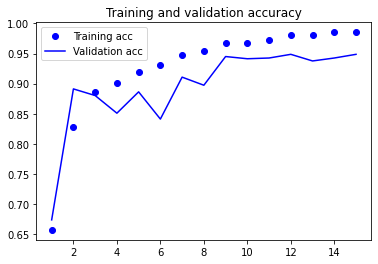

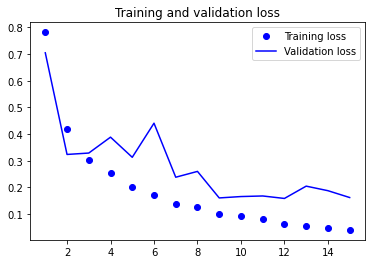

In [52]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [53]:
model.save('grapes_trained_model.h5')